In [1]:
### Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Load Dataset
companies_df = pd.read_csv('1000_Companies.csv ')
companies_df

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [3]:
### Exploratory Data Analysis
#first five rows of the Dataframe
companies_df.head()

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#statiscal description
companies_df.describe()

,RandDSpend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [5]:
#checking for missing values
companies_df.isnull().sum()

RandDSpend        0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [6]:
#Correlation between columns
C = companies_df.corr()
C

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5644\2738535587.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C = companies_df.corr()


,RandDSpend,Administration,MarketingSpend,Profit
RandDSpend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
MarketingSpend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<Axes: >

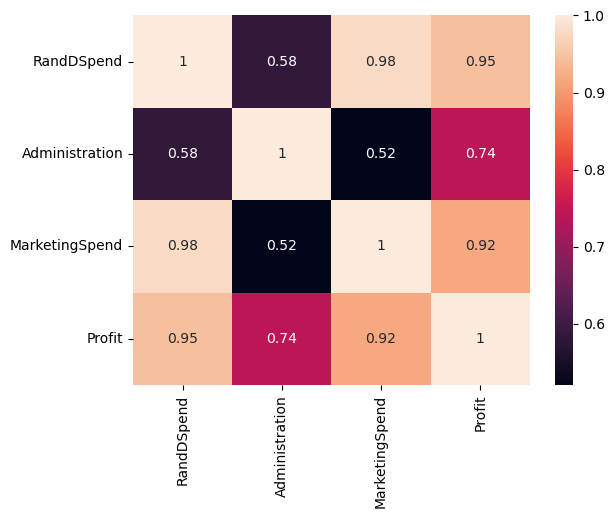

In [7]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(C, annot=True)

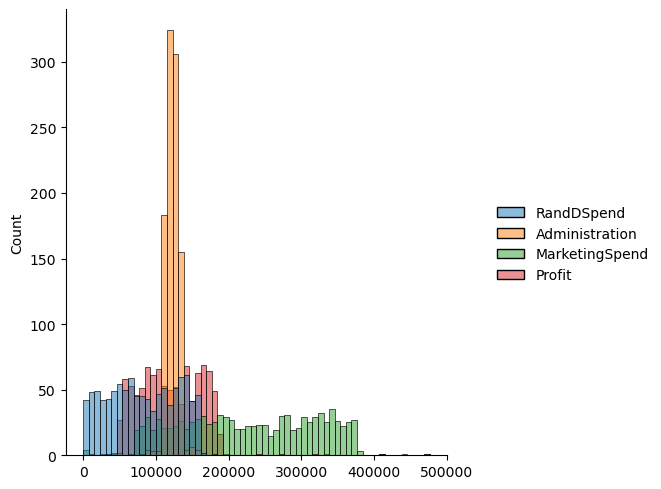

In [8]:
sns.displot(companies_df)

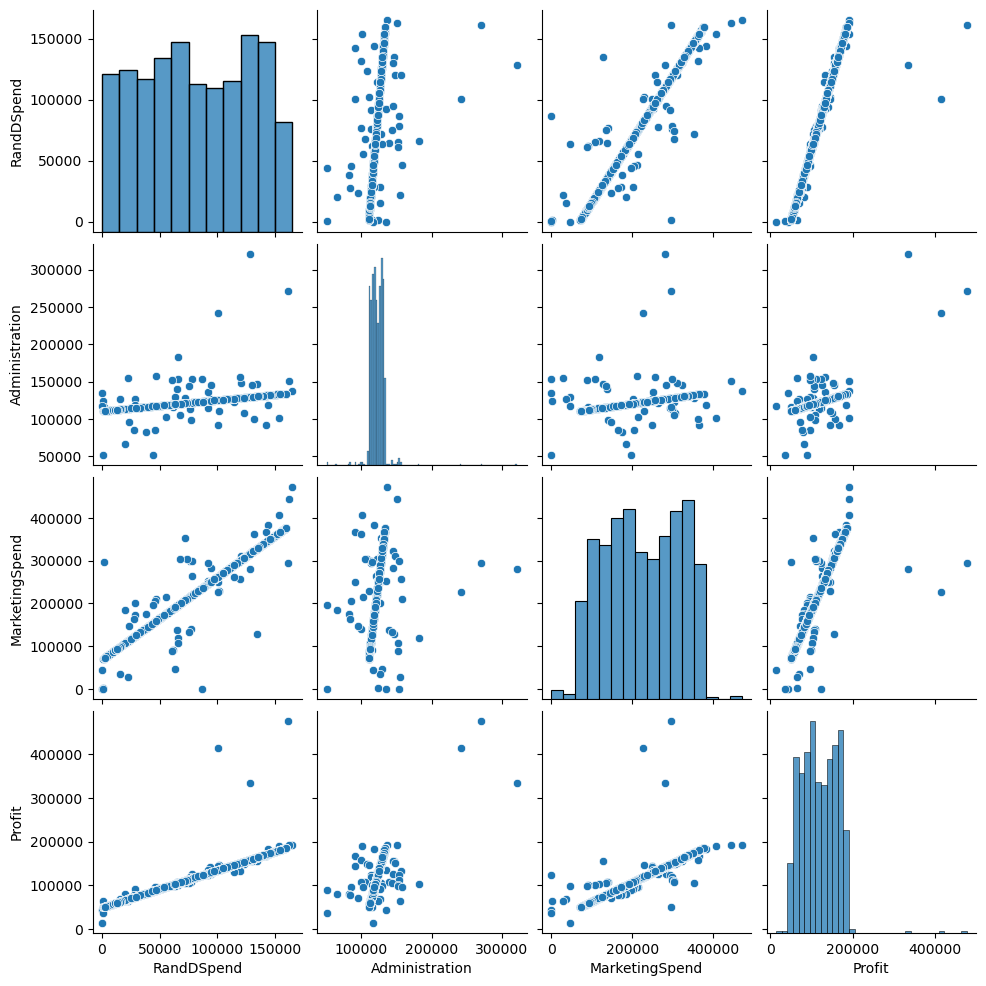

In [9]:
sns.pairplot(companies_df)

In [10]:
### Building the regression model 
#split dataset into X and Y variables
X = companies_df.iloc[:,:-1].values
y = companies_df.iloc[:,4].values

In [11]:
companies_df.iloc[:,4]

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [12]:
### Encoding Categorical Data
#import libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
#creating dummy variables for state using ColumnTransformer, OneHotEncoder and LabelEncoder
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

In [14]:
X

array([[0.0, 0.0, 1.0, 996, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 995, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 947, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 601, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 775, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 994, 270939.86, 295442.17]], dtype=object)

In [15]:
#training the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [16]:
#fit multiple linear regression model
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression() 

Linear_model.fit(X_train,y_train)

LinearRegression()

In [17]:
#predicting the test results 
y_pred = Linear_model.predict(X_test) 
y_pred

array([ 89622.46069768,  87842.55305134,  94735.06117603, 176669.56121366,
        82643.61914814, 111801.04848311, 135056.04016296,  91291.96495689,
       164327.16255757,  53578.79149001,  67114.0118091 , 149332.22993219,
       126799.36640531,  59503.74112216, 178551.49249541,  75156.70007112,
       119168.05794539, 164036.1750327 , 169263.4776569 , 182827.56076681,
       118357.65723565,  84917.85182229, 181382.63623903,  83394.8008045 ,
       105648.55391736, 101088.48645933,  53554.17695968,  57066.32262255,
        68892.81229204, 210493.2846231 , 121351.19723223, 112888.21436112,
       101799.384907  , 136816.46605785,  63772.95973932, 109998.89011469,
       186892.91523247, 172159.01876306, 175834.76272555, 118605.02954019,
        96669.07630986, 165209.84494093, 108881.02173089,  50622.53667706,
       117477.19284194,  58806.36394423, 157283.95676595,  78167.71608145,
       158880.25393449, 131153.37591566, 185343.19106032, 175739.21942814,
        93934.57177399,  

In [18]:
#calculating coefficients 
print(Linear_model.coef_)

print(Linear_model.intercept_)

[ 4.98273370e+02 -3.40908467e+02 -1.57364903e+02  8.09467976e+01
  8.55211932e-01  1.19052449e-01]
-52854.18042065931


In [19]:
#Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.9114714505439216